In [1]:
%load_ext autoreload
%autoreload

The data is already cleaned because its gotten from Kaggle

In [5]:
import os 
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
from wordcloud import WordCloud

import utils

data_file = "car_prices.csv"

PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'csv')

DATA_FILE = os.path.join(DATA_DIR, data_file)

df = pd.read_csv(DATA_FILE)

df = utils.clean_data(df)
csv = df

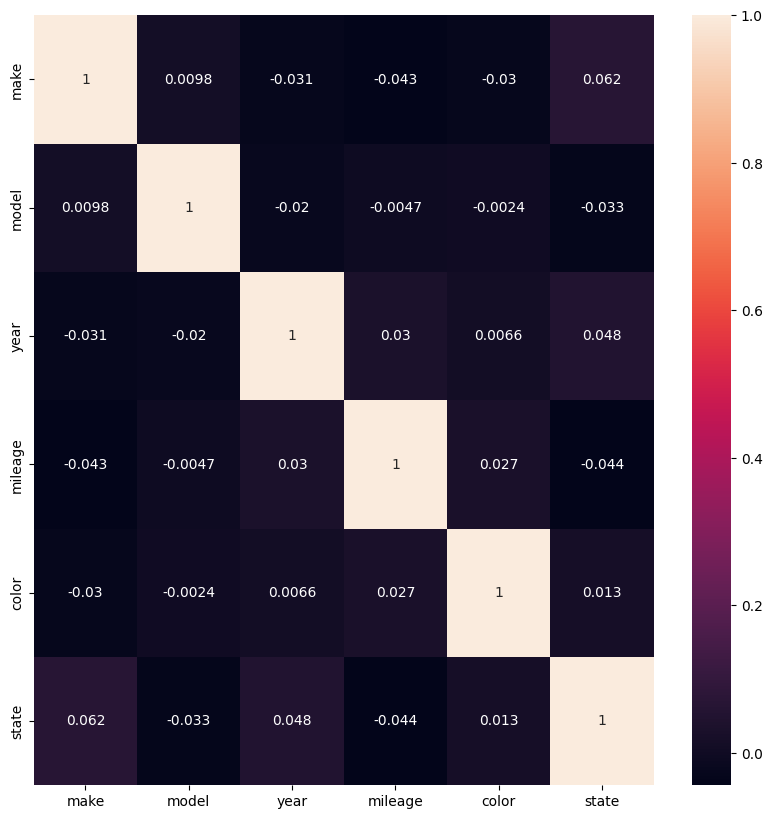

In [16]:
#Correlation
df = csv.copy()
df.drop(["date", "price"], axis=1, inplace=True)
le = LabelEncoder()
for col in df.columns:
  df[col] = le.fit_transform(df[col])
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
#Barchart
@interact
def barplot(x = csv.drop(["make", "mileage", "price", "date"], axis=1).columns, y = csv[["mileage", "price"]].columns):
	
	clear_output(wait=True)
	df = csv.groupby(["make", x]).sum(["price", "mileage"])
	df.reset_index(inplace=True)
	df = df.pivot(index="make", columns=x, values=y)
	ax = df.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="cividis")
	ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.0f}"))
	plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
	plt.show()



interactive(children=(Dropdown(description='x', options=('model', 'year', 'color', 'state'), value='model'), D…

In [7]:
#Wordcloud
@interact
def wcplot(marca = csv["make"].unique()):
	clear_output(wait=True)
	texto = " ".join([mod for mod in csv[csv["make"]==marca]["model"]])
	wc = WordCloud(
		
		width=1500,
		height=1000,
		random_state=1,
		background_color="black",
		colormap="Blues_r",
		collocations=False
		
	).generate(text=texto)
	plt.imshow(wc)
	plt.axis('off')
	plt.show()

interactive(children=(Dropdown(description='marca', options=('Chevrolet', 'Toyota', 'Nissan', 'Ford', 'Honda')…

In [15]:
#Time series
@interact
def line_date_plot(x=csv["make"].unique(), y=csv[["mileage", "price"]].columns, fecha = ["Yearly", "Monthly", "Daily"], hue = csv.drop(["make", "mileage", "price", "date", "year"], axis=1).columns):
  clear_output(wait=True)
  dic = {
    "Yearly": "%Y",
    "Monthly": "%Y-%m",
    "Daily": "%d"
  }
  df = csv[csv["make"]==x]
  df=df.assign(date=pd.to_datetime(df['date']).dt.date)
  df["group"] = df["date"].apply(lambda x: x.strftime(f"{dic[fecha]}"))
  df.sort_values(by="group", inplace=True)
  plt.figure(figsize=(23, 5))
  #I want legend on the right bottom
  sns.lineplot(data=df, x="group", y=y, palette="cividis", hue=hue, linewidth=2.5, linestyle="dashed")
  plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
  plt.show()
  
  

interactive(children=(Dropdown(description='x', options=('Chevrolet', 'Toyota', 'Nissan', 'Ford', 'Honda'), va…

In [11]:
#Boxplot
@interact
def bp(By = csv.drop(["mileage", "price", "date", "year"], axis=1).columns.to_list()):
  clear_output(wait=True)
  df = csv.copy()
  df = df.groupby(By).mean("price")
  df.reset_index(inplace=True)
  df.sort_values(by="price", inplace=True)
  plt.figure(figsize=(10, 10))
  sns.boxplot(data=csv, x=By, y="price")
  plt.show()


interactive(children=(Dropdown(description='By', options=('make', 'model', 'color', 'state'), value='make'), O…